# Global Imports

In [62]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
from skimage.morphology import thin, skeletonize
import cv2


# Local Imports

# Constants

In [63]:
CSV_SEPERATOR: str = "⯑"

# Paths

In [64]:
file_dirpath: str = os.path.abspath(".")
root_dirpath: str = os.path.join(
    file_dirpath,
    os.pardir
)
dataset_dirpath: str = os.path.join(
    root_dirpath,
    "dataset"
)
apl_dirpath: str = os.path.join(
    dataset_dirpath,
    "apl_dataset"
)

metadata_df_path: str = os.path.join(
    dataset_dirpath,
    "metadata_apl.csv"
)
metadata_df_out_path: str = os.path.join(
    dataset_dirpath,
    "metadata_apl_fix.csv"
)


# Fix Metadata CSV

In [65]:
new_contents: list[str] = ["filename⯑label\n"]

with open(
    metadata_df_path, 
    "r", 
    encoding="utf-8"
) as f:
    f.__next__()
    
    line: str
    for line in f.readlines():
        comma_index: int = line.index(",")
        
        string_start_with_speech: bool = line[comma_index+1] == "\""
        string_end_with_speech: bool = line[-2] == "\""
        
        updated_line: str = line[15:comma_index] + CSV_SEPERATOR + line[comma_index + int(string_start_with_speech) + 1:]
        
        if string_end_with_speech:
            updated_line = updated_line[:-2] + "\n"
        
        new_contents.append(updated_line)

with open(metadata_df_out_path, "w", encoding="utf-8") as f:
    f.write("".join(new_contents))        
      

# Load Metadata DataFrame

In [66]:
metadata_df: pd.DataFrame = pd.read_csv(
    metadata_df_out_path,
    delimiter=CSV_SEPERATOR,
    engine='python'
)

# Load Images

In [67]:
filenames: list[str] = metadata_df["filename"].to_list()
labels: list[str] = metadata_df["filename"].to_list()

In [68]:
def thicken(
    image: Image.Image | np.ndarray,
    kernel_size: int,
    sigma: float,
) -> np.ndarray:
    
    image: np.ndarray = np.asarray(image)
    
    blurred: np.ndarray = cv2.GaussianBlur(
        image, 
        (kernel_size, kernel_size), 
        sigmaX=sigma,
        sigmaY=sigma
    ) 

    # Apply a binary threshold to retain black-and-white format
    #thickened: np.ndarray
    #_, thickened = cv2.threshold(
    #    blurred, 
    #    threshold, 
    #    255, 
    #    cv2.THRESH_BINARY
    #)
    #
    return blurred

def threshold(
    image: np.ndarray,
    thresh: int
) -> np.ndarray:
    # Apply a binary threshold to retain black-and-white format
    thickened: np.ndarray
    _, thickened = cv2.threshold(
        image, 
        thresh, 
        255, 
        cv2.THRESH_BINARY
    )
    
    return thickened

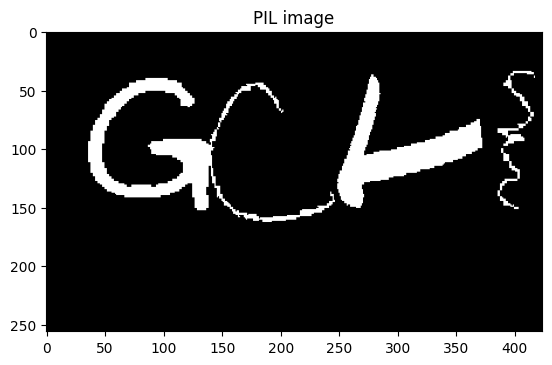

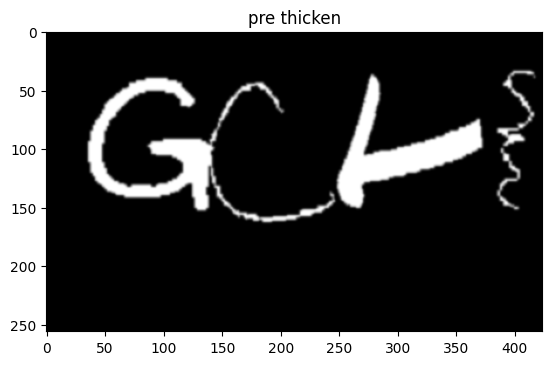

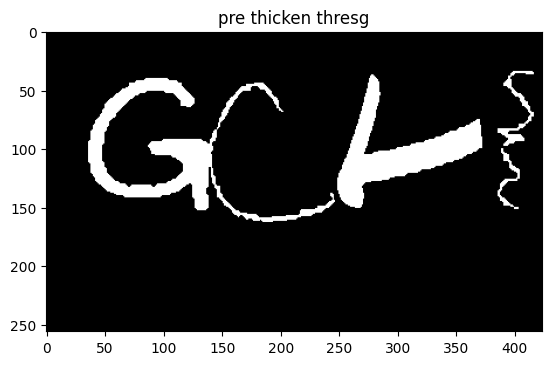

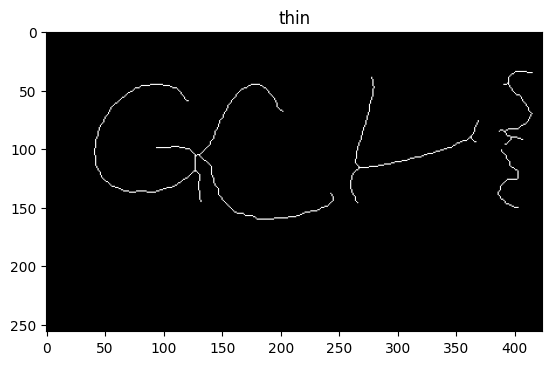

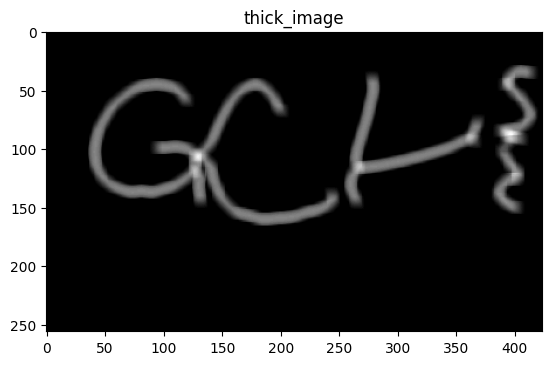

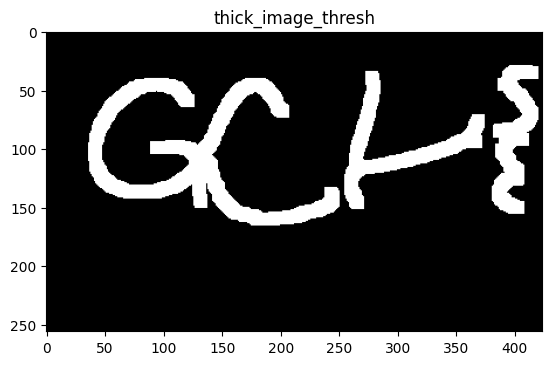

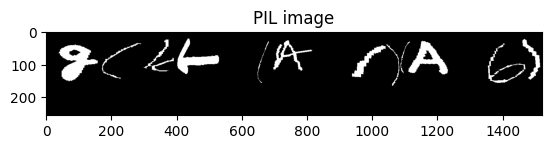

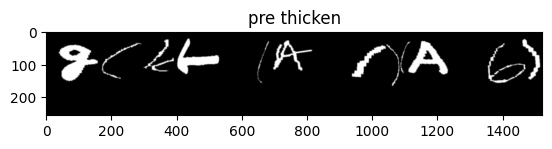

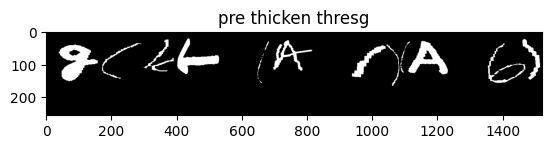

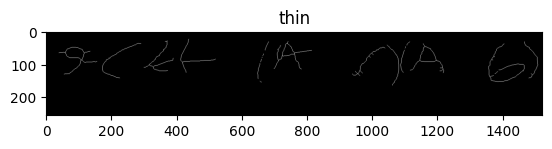

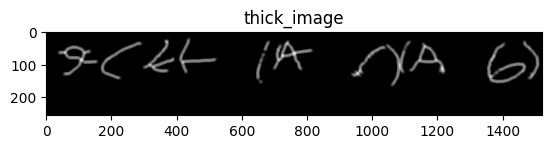

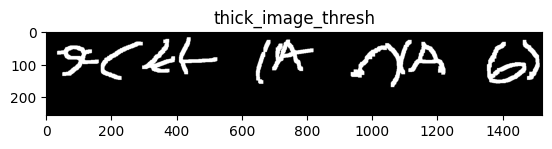

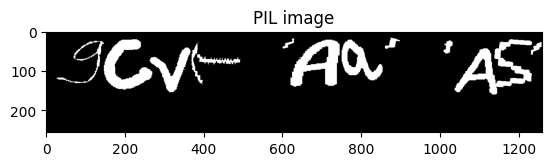

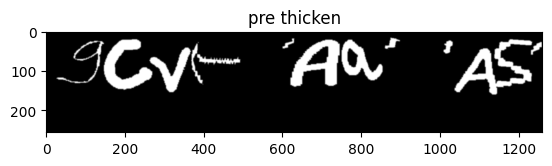

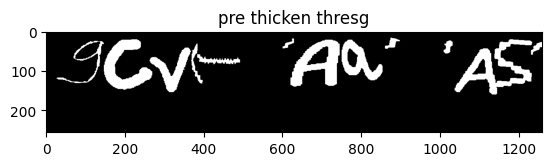

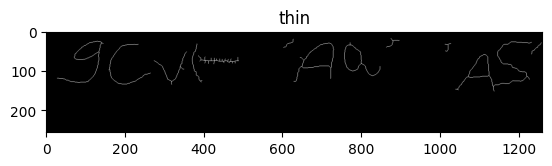

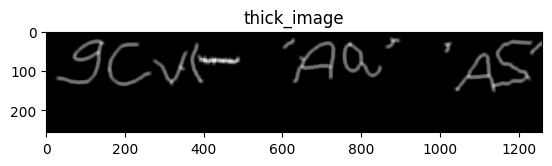

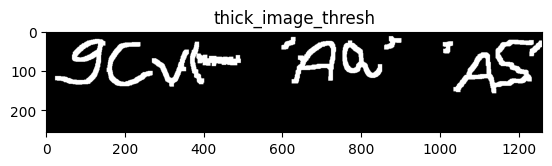

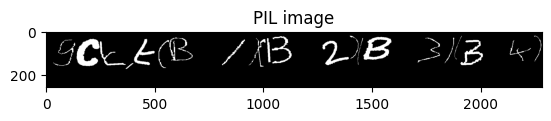

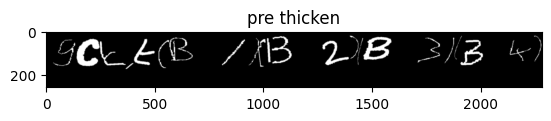

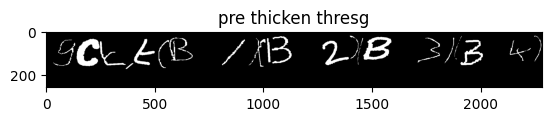

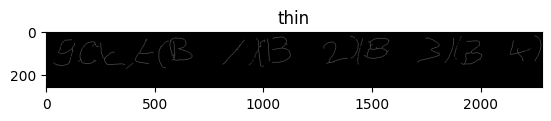

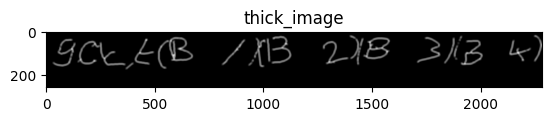

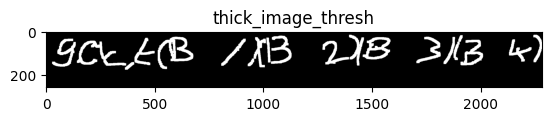

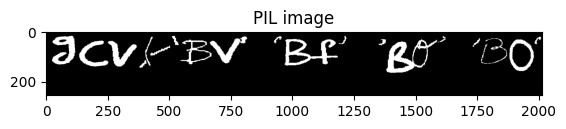

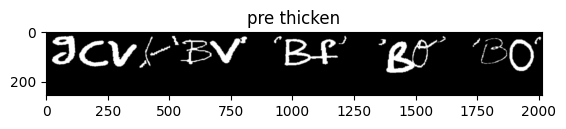

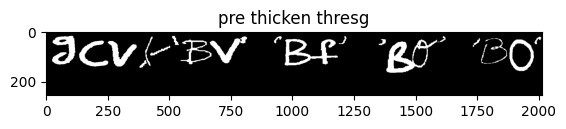

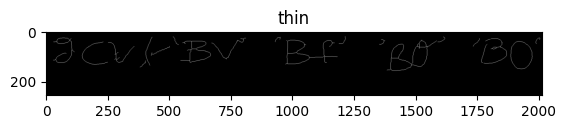

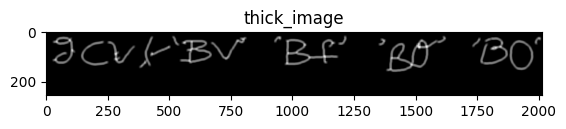

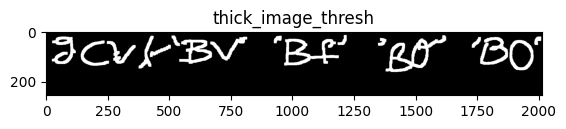

In [69]:
filename: str
label: str
for filename, label in zip(filenames[:5], labels[:5]):
    
    filepath: str = os.path.join(
        apl_dirpath,
        filename
    )
    
    pil_image: Image.Image = Image.open(
        filepath
    )
    
    pre_thicken: np.ndarray = thicken(
        pil_image, 
        kernel_size=5,
        sigma=1.0,
    )
    
    pre_thicken_thresh: np.ndarray = threshold(
        pre_thicken,
        thresh=100
    )
    
    thin_image: np.ndarray = skeletonize(
        pre_thicken_thresh
    ).astype(np.uint8)*255
    
    thick_image: np.ndarray = thicken(
        thin_image, 
        kernel_size=11,
        sigma=5.0,
    )
    
    thick_image_thresh: np.ndarray = threshold(
        thick_image,
        0
    )
    
    plt.imshow(pil_image, cmap="gray")
    plt.title("PIL image")
    plt.show()
    
    plt.imshow(pre_thicken, cmap="gray")
    plt.title("pre thicken")
    plt.show()
    
    plt.imshow(pre_thicken_thresh, cmap="gray")
    plt.title("pre thicken thresg")
    plt.show()
    
    
    plt.imshow(thin_image, cmap="gray")
    plt.title("thin")
    plt.show()
    
    plt.imshow(thick_image, cmap="gray")
    plt.title("thick_image")
    plt.show()
    
    plt.imshow(thick_image_thresh, cmap="gray")
    plt.title("thick_image_thresh")
    plt.show()
    